<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/edo/blob/main/banco_preguntas/trabajo_final_dinamica_poblacional/5_palomino_yesi/palomino_yesi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Describa la situación agregándole imágenes ilustrativas. 
Deje claro cual es el problema a resolver. 

# Crecimiento de bacterias

Crecimiento de bacterias En el tiempo $t = 0$, un cultivo bacteriano pesa 1 gramo. Dos horas después, el cultivo pesa 4 
gramos. El peso máximo del cultivo es de 20 gramos.  

 a) Escribir una ecuación logística que modele el peso del cultivo bacteriano.  
 
 b) Encontrar el peso del cultivo después de 5 horas.  
 
 c) ¿Cuándo el peso del cultivo será de 18 gramos?  
 
 d) Escribir una ecuación diferencial logística que modele la razón de crecimiento del peso del cultivo. Entonces repetir 
el inciso b) mediante el método de Euler con un tamaño de  paso de h  1. Comparar la aproximación con los resultados
exactos.  

 e) ¿En qué tiempo se incrementará el peso más rápidamente? Explicar.

## Recuerde que la ecuación logística es:

$$ \frac{dy}{dt} = ky \left( 1 - \frac{y}{L} \right) $$

donde $k$ y $L$ son constantes positivas. 
Una población que satisface esta ecuación no crece sin límite, pero se aproxima a la cantidad límite o de soporte $L$ al aumentar $t$. 


## Realizar una lectura o interpretación de la ED y de la condición inicial

$$ \frac{dw}{dt} = kw\left(1 - \frac{w}{20} \right), \ \ \ \ \ \ w(0) = 1, \ \ \ \ \ w(2) = 4 $$

Suponiendo que $w < 20$, entonces $\frac{w}{20} < 1$, de donde $0 < 1 - \frac{w}{20}$, es decir, este factor es positivo y decreciente a cero. 

## Clasifica la ED justificando su proceso de clasificación

Como la ecuación dada es de la forma $w' = f(w)g(t)$, entonces la ED dada es separable. 

## Realice la solución analítica y describala con fluidez 

Una línea del cuaderno por paso descrito verbalmente, simbólicamente y justificado verbalmente. 

$$ \frac{dw}{dt} = kw\left(1- \frac{w}{20} \right), \ \ \ \ \ \  w(0) = 1 $$

Empecemos sepando las variables: 
$$ \frac{dw}{w\left( 1- \frac{w}{20}  \right)} = kdt $$

sumando y dividiendo fracciones obtenemos: 

$$ \frac{20}{w(20-w)}dw = kdt $$

y ahora que separamos integremos cada lado: 

$$ \int \frac{20}{w(20-w)}dw = \int kdt $$

$$ 20\int \frac{1}{w(20-w)}dw = \int kdt $$

Note que el integrando del lado izquierdo es una fracción propia, donde los factores del denominador son lineales no repetidos, por tanto esa fracción se descompone así:


$$ 20 \int \left( \frac{A}{w} + \frac{B}{20-w} \right) = \int kdt $$

Para determinar a $A$ y a $B$ planteamos la siguiente igualdad:

$$ \frac{1}{w(20-w)}  =  \frac{A}{w} + \frac{B}{20-w}  $$


$$ \frac{1}{w(20-w)}  = \frac{A(20 - w) + Bw}{w(20-w)} $$

Pasemos el denominador del lado derecho a multiplicar al lado izquierdo:

$$ \frac{w(20-w)}{w(20-w)}  = A(20 - w) + Bw $$

$$ 1 = A(20 - w) + Bw  $$

Si hago $w = 0$, podemos hallar a $A$:

$$ 1 = A(20 - 0) + B(0) \: \: \: \Rightarrow \ \ \ A = \frac{1}{20} = B$$


Volviendo a la ecuación integral obtenemos:


$$ \int \left( \frac{1}{w} + \frac{1}{20-w} \right)dw = \int kdt $$

$$ \int \frac{dw}{w} + \int \frac{dw}{20-w} = kt + C $$

$$ \ln w - \ln (20 - w ) = kt + C $$

$$ \ln \left( \frac{w}{20-w} \right) = kt + C $$

$$ \frac{w}{20-w} = e^{kt + C} $$

$$ w = e^{kt + C}(20 - w) = e^{kt}e^{C}(20-w)$$

$$ w = e^{kt}C_{1}(20 - w) $$

$$  $$

# Realice la solución con SymPy del PVI y verifique la solución obtenida también con Sympy

In [12]:
from sympy import var, Function, Eq, diff, classify_ode, dsolve,  checkodesol

In [6]:
t,w, k = var('t w k') 

In [7]:
w = Function('w')

In [11]:
ecuacion = Eq(diff(w(t), t),k*w(t)*(1-w(t)/20) )
ecuacion 

Eq(Derivative(w(t), t), k*(1 - w(t)/20)*w(t))

In [13]:
classify_ode(ecuacion, w(t))

('factorable',
 'separable',
 '1st_exact',
 'Bernoulli',
 '1st_rational_riccati',
 '1st_power_series',
 'lie_group',
 'separable_Integral',
 '1st_exact_Integral',
 'Bernoulli_Integral')

In [15]:
sol_gen = dsolve(ecuacion, w(t), hint = 'separable')
sol_gen 

Eq(w(t), 20/(C1*exp(-k*t) + 1))

In [17]:
sol_pvi = dsolve(ecuacion, w(t), hint = 'separable', ics = {sol_gen.lhs.subs(t,0): 1})
sol_pvi 

Eq(w(t), 20/(1 + 19*exp(-k*t)))

## Determine $k$ utilizando la segunda condición del problema, es decir, utilizando que cuando $t = 2$, $w = 4$

## Grafique con matplotlib la solución general de la ED que hace parte de su PVI

La gráfica de la solución general la debe hacer incluyendo el deslizador para el parámetro $C_{1}$. 


In [21]:
import numpy as np 
def w(t, k):
    return 20/(1 + 19*np.exp(-k*t))

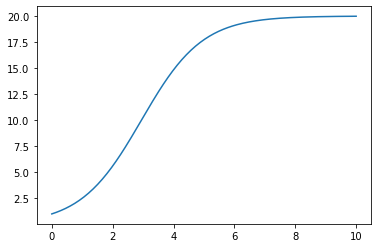

In [22]:
import numpy as np 
import matplotlib.pyplot as plt 

a,b = 0, 10
k = 1

fig,ax = plt.subplots()
dominio = np.linspace(a,b, 200)
rango = [w(t,k = 1) for t in dominio]
ax.plot(dominio, rango)   


## Observaciones e inferencias del gráfico

1.  
2.  
3.  
4.  
5.  

# Gráfica de la solución del PVI

In [5]:
import numpy as np 


## Observaciones e inferencias del gráfico del PVI

1.  
2.  
3.  
4.  
5.  